# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this Data Analysis project, I am investigating a TMDb movies database file which contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

In [64]:
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [65]:
# load in data and print out the head # load i 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [66]:
# check the rows and columns of this dataset
df.shape

(10866, 21)

In [67]:
# check datatypes to see if there are some wrongly categorized types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [68]:
# check each columns number of unique values 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [69]:
# statistic values for this data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [71]:
# check if there are some duplicates 
df.duplicated().sum()

1

In [72]:
# drop the duplicates
df.drop_duplicates(inplace=True)

In [73]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Data is relatively clean. There was one duplicate record and I have deleted it.


### Data Cleaning 

>We will only keep the columns we need and remove the rest of them. Columns to delete -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies.

>Find out which movies have a value of '0' in their budget or revenue, and then delete those movies from database.

In [74]:
#lets put the columns that needs to be deleted in a list
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies']
 
#deleting the columns from the database
df = df.drop(del_col, 1)

#now take a look at this new dataset
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [75]:
#giving list of column names that needs to be checked
check_row = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
df[check_row] = df[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
df.dropna(subset = check_row, inplace = True)

rows, col = df.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 3853 entries of movies.


In [76]:
#Lets if we have any movie with a runtime value of 0.
df['runtime'] = df['runtime'].replace(0, np.NaN)

In [77]:
#calling the column which need to be formatted in datetime and storing those values in them
df.release_date = pd.to_datetime(df['release_date'])

#showing the dataset
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [78]:
#rename function renames the columns, the key as being the old name and its value new name of it in form of dictionary.
df.rename(columns = {'budget' : 'budget_(in_US-Dollars)', 'revenue' : 'revenue_(in_US-Dollars)'}, inplace = True)

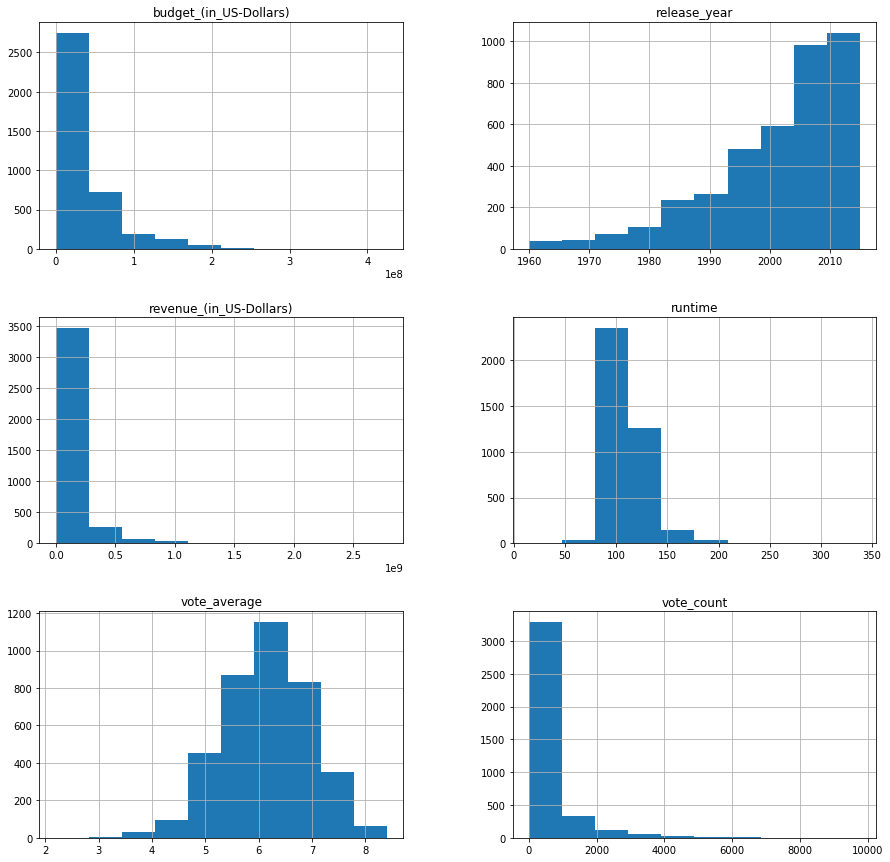

In [79]:
# visulize each variables 
df.hist(figsize=(15,15));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which movie earns the most and least profit?

In [80]:
#assigning a new column which will hold the profit values of each movie

#the insert function's first argument is an index number given to locate the column, second argument takes the name of the new column...
#...and last but not least it takes the calculation values to output for specific column

#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
df.insert(2, 'profit_(in_US_Dollars)', df['revenue_(in_US-Dollars)'] - df['budget_(in_US-Dollars)'])

#for just in case situations or for convenience, we change the data type to int
df['profit_(in_US_Dollars)'] = df['profit_(in_US_Dollars)'].apply(np.int64)

#showing the dataset
df.head()


,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000.0,3.784364e+08,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,110000000.0,2.952382e+08,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,200000000.0,2.068178e+09,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,190000000.0,1.506249e+09,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [81]:
#highest
#taking the index value of the highest number in profit column
highest_id = df['profit_(in_US_Dollars)'].idxmax()
#calling by index number,storing that row info to a variable
highest_details = pd.DataFrame(df.loc[highest_id])
    
#lowest
#same processing as above
lowest_id = df['profit_(in_US_Dollars)'].idxmin()
lowest_details = pd.DataFrame(df.loc[lowest_id])
    
#concatenating two dataframes
pd.concat([highest_details, lowest_details], axis = 1)
    

,1386,2244
budget_(in_US-Dollars),2.37e+08,4.25e+08
revenue_(in_US-Dollars),2.78151e+09,1.10876e+07
profit_(in_US_Dollars),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


he column names for the dataframes above are the index number. The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

As we can see the Directed by James Cameron, Avatar film has the highest profit in all, making over $2.5B in profit in this dataset. May be the highest till now of entire human race but we can't say for sure as this dataset doesn't have all the films released till date.

And the most in loss movie in this dataset is The Warriors Way. Going in loss by more than $400M was directed by Singmoo Lee.

### Research Question 2:  How are runtimes, revenues and budgets trending over time?

In [82]:
df_new = df.groupby('release_year').mean()

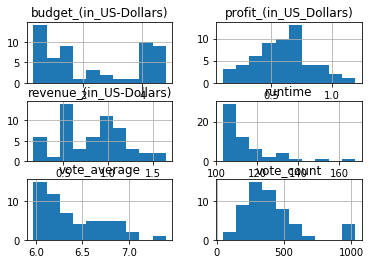

In [83]:
df_new.hist();

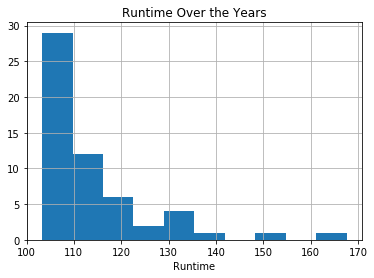

In [84]:
df_new['runtime'].hist()
plt.xlabel('Runtime')
plt.title('Runtime Over the Years');

In [85]:
df_new['runtime'].describe()

count     56.000000
mean     114.847356
std       12.203451
min      103.304348
25%      107.932782
50%      109.718896
75%      118.346154
max      167.600000
Name: runtime, dtype: float64

As seen in the plots and functions above, popular runtimes over the years are between 104 and 107 minutes.
The distribution is right skewed.

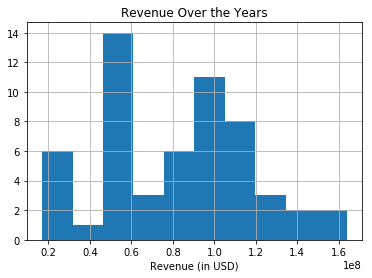

In [86]:
df_new['revenue_(in_US-Dollars)'].hist()
plt.xlabel('Revenue (in USD)')
plt.title('Revenue Over the Years');

In [87]:
df_new['revenue_(in_US-Dollars)'].describe()

count    5.600000e+01
mean     8.243045e+07
std      3.485129e+07
min      1.694734e+07
25%      5.534794e+07
50%      8.870526e+07
75%      1.062821e+08
max      1.637683e+08
Name: revenue_(in_US-Dollars), dtype: float64

### Research Question 3: Ratings for the Cheapest and Most Expensive Movies


I was curious about if there are any measurable difference between votes of the most and the least expensive movies. I decided to get information about the most and least expensive films and viualize the distribution of their votes in one histogram.

#### Part 3.1: Get the most expensive movies
At first, I sorted the movies by budget to get the 200 most expensive movies from the database.

In [88]:
# Sort movies by budget in descending order

sorted_budget_biggest = df.sort_values(by=['budget_(in_US-Dollars)'], ascending = False).head(200)

In [90]:
# Get the most expensive movies with ratings

sorted_budget_biggest.groupby('original_title')['vote_average'].mean()

original_title
2012                                   5.6
47 Ronin                               5.8
4: Rise of the Silver Surfer           5.4
A Christmas Carol                      6.6
After Earth                            5.1
Alexander                              5.6
Alice in Wonderland                    6.3
Angels & Demons                        6.3
Ant-Man                                7.0
Armageddon                             6.4
Australia                              6.3
Avatar                                 7.1
Avengers: Age of Ultron                7.4
Bad Boys II                            6.3
Batman Begins                          7.3
Battleship                             5.5
Bee Movie                              5.6
Big Hero 6                             7.8
Bolt                                   6.3
Brave                                  6.6
Captain America: The First Avenger     6.5
Captain America: The Winter Soldier    7.6
Cars 2                                 

In [92]:
# Save the results to a variable.

exp_budget_vote = sorted_budget_biggest.groupby(['original_title'])['vote_average'].mean()

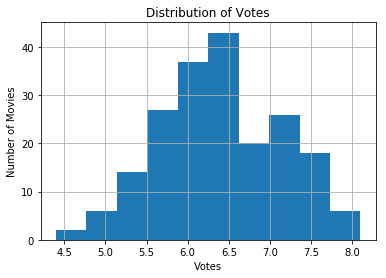

In [93]:
# Create a plot to visualize the results

plt.xlabel('Votes')
plt.ylabel('Number of Movies')
plt.title('Distribution of Votes')

exp_budget_vote.hist(histtype = 'stepfilled', label = 'Rates of the Most Expensive Movies')

#### Part 3.2: get the cheapest movies
I queried the 200 cheapest movies from the database.

In [97]:
# Get the cheapest movies with ratings
 
sorted_budget_cheapest = df.sort_values(by=['budget_(in_US-Dollars)'], ascending = True).head(200)

I queried the cheapest movies and their rating.

In [98]:
cheap_budget_vote = sorted_budget_cheapest.groupby('original_title')['vote_average'].mean()

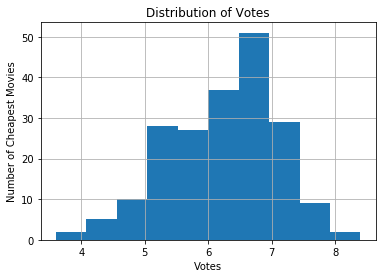

In [99]:
plt.xlabel('Votes')
plt.ylabel('Number of Cheapest Movies')
plt.title('Distribution of Votes')

cheap_budget_vote.hist(label = 'Rates of the Cheapest Movies')

 created a histogram to visualize the distribuion.

#### Part 3.3: Compare the results in one diagram

I created a diagram to display the differences between the ratings.

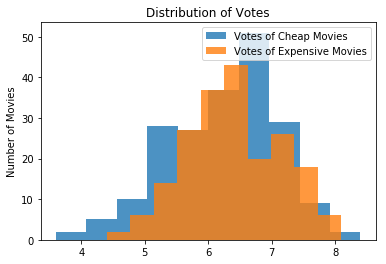

In [102]:
plt.hist(cheap_budget_vote, alpha=0.8, label='Votes of Cheap Movies')
plt.hist(exp_budget_vote, alpha=0.8, label='Votes of Expensive Movies')
plt.ylabel('Number of Movies')
plt.title('Distribution of Votes')
plt.legend(loc='upper right')
plt.show()

#### Part 3.4: Conclusion
As a conclusion, I can say that the most expensive movies generally got better rating that the cheaper ones. We can see on the diagram that the worst rating is 4.5 while the cheapest movies worst rating were lower than 2.

<a id='conclusions'></a>
## Conclusions
In first part i found out highest and least earning movies. And then i analyzed, how are runtimes, revenues and budgets trending over time?

Later I analyzed the ratings of the most and least expensive movies and I found out that the more expensive movies got higher votes than the cheaper ones.

## Limitations
The way that data is collected is unknown. The way the data is collected may bias towards certain type of movies. For example, imdb may spend more efforts on collecting all information of popular movies than unpopular movies.


I made my calculations based on the values of budget adjustment to take the fluctuations into account, I found this really useful. But there were more missing values in the 'budget_adj' column. During the cleaning process I replaced the missing values with the average, but it still can distort the result (for instance, there would be other movies among the most expensive 200 movies).

